In [1]:
# Import Pythin libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Data understanding

In [2]:
# Load telecom churn data
df_churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Check size of data
df_churn.shape

(99999, 226)

In [4]:
# Inspect data
df_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# Check data fields
df_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [6]:
# Get data description
df_churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [7]:
# create column name list by types of columns
# After analysing columns, we can seggregate columns into different types
# 1. Id columns, Help identify each customer uniquely, not neccessary for prediction
# 2. Date columns, Not useful for this analysis, as we are using months for analysis
# 3. Categorical columns, There are no categorical columns, but close analysis will reveal numerical columns with 
# categorical values

id_columns = ['mobile_number']

date_columns= ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cateogorical_columns =  ['night_pck_user_6',
                         'night_pck_user_7',
                         'night_pck_user_8',
                         'night_pck_user_9',
                         'fb_user_6',
                         'fb_user_7',
                         'fb_user_8',
                         'fb_user_9'
                        ]

# Rest all columns as see are numerical
numerical_columns = [column for column in df_churn.columns if column not in id_columns + date_columns + cateogorical_columns]

# Data Cleaning

We have large number of columns (226) and not all of them are useful for making predictions and therefore candidate for removal

In [8]:
# Look for columns with only 1 unique value, Such columns are not useful for prediction and candidate to be dropped
for column in df_churn.columns:
    print(column, df_churn[column].nunique())

mobile_number 99999
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
last_date_of_month_9 1
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24313
onnet_mou_7 24336
onnet_mou_8 24089
onnet_mou_9 23565
offnet_mou_6 31140
offnet_mou_7 31023
offnet_mou_8 30908
offnet_mou_9 30077
roam_ic_mou_6 6512
roam_ic_mou_7 5230
roam_ic_mou_8 5315
roam_ic_mou_9 4827
roam_og_mou_6 8038
roam_og_mou_7 6639
roam_og_mou_8 6504
roam_og_mou_9 5882
loc_og_t2t_mou_6 13539
loc_og_t2t_mou_7 13411
loc_og_t2t_mou_8 13336
loc_og_t2t_mou_9 12949
loc_og_t2m_mou_6 20905
loc_og_t2m_mou_7 20637
loc_og_t2m_mou_8 20544
loc_og_t2m_mou_9 20141
loc_og_t2f_mou_6 3860
loc_og_t2f_mou_7 3863
loc_og_t2f_mou_8 3807
loc_og_t2f_mou_9 3758
loc_og_t2c_mou_6 2235
loc_og_t2c_mou_7 2426
loc_og_t2c_mou_8 2516
loc_og_t2c_mou_9 2332
loc_og_mou_6 26372
loc_og_mou_7 26091
loc_og_mou_8 25990
loc_og_mou_9 25376
std_og_t2t_mou_6 18244
std_og_t2t_mou

In [9]:
# Drop columns with only one unique value, non date columns

drop_unique_single_value = ["std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9",
                            "circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"]

df_churn = df_churn.drop(drop_unique_single_value, axis=1)
print(df_churn.shape)

(99999, 218)


In [10]:
# drop id and date columns
df_churn = df_churn.drop(id_columns + date_columns, axis=1)
print(df_churn.shape)

(99999, 205)


Check missing value percentages for each column

In [11]:
# Find missing value percentage for each column
round(100 * df_churn.isnull().sum() / len(df_churn.index), 2)

arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
arpu_9               0.00
onnet_mou_6          3.94
onnet_mou_7          3.86
onnet_mou_8          5.38
onnet_mou_9          7.75
offnet_mou_6         3.94
offnet_mou_7         3.86
offnet_mou_8         5.38
offnet_mou_9         7.75
roam_ic_mou_6        3.94
roam_ic_mou_7        3.86
roam_ic_mou_8        5.38
roam_ic_mou_9        7.75
roam_og_mou_6        3.94
roam_og_mou_7        3.86
roam_og_mou_8        5.38
roam_og_mou_9        7.75
loc_og_t2t_mou_6     3.94
loc_og_t2t_mou_7     3.86
loc_og_t2t_mou_8     5.38
loc_og_t2t_mou_9     7.75
loc_og_t2m_mou_6     3.94
loc_og_t2m_mou_7     3.86
loc_og_t2m_mou_8     5.38
loc_og_t2m_mou_9     7.75
loc_og_t2f_mou_6     3.94
loc_og_t2f_mou_7     3.86
                    ...  
arpu_2g_9           74.08
night_pck_user_6    74.85
night_pck_user_7    74.43
night_pck_user_8    73.66
night_pck_user_9    74.08
monthly_2g_6         0.00
monthly_2g_7         0.00
monthly_2g_8

In [12]:
# some recharge columns have minimum value of 1 while some don't
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df_churn[recharge_columns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [13]:
# create a list of columns to replace with 0's
zero_replace = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [14]:
# replace missing values with 0
df_churn[zero_replace] = df_churn[zero_replace].apply(lambda x: x.fillna(0))

Replace null values in categorical variables, We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [15]:
# replace missing values with '-1' in categorical columns
df_churn[cateogorical_columns] = df_churn[cateogorical_columns].apply(lambda x: x.fillna(-1))

Drop columns with more then 50% missing values

In [16]:
retain_columns = list(df_churn.apply(lambda column: True if column.isnull().sum()/len(df_churn.index) < 0.5 else False))

drop_missing = pd.DataFrame({'features':df_churn.columns , 'include': retain_columns})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,arpu_6,True
1,arpu_7,True
2,arpu_8,True
3,arpu_9,True
4,onnet_mou_6,True
5,onnet_mou_7,True
6,onnet_mou_8,True
7,onnet_mou_9,True
8,offnet_mou_6,True
9,offnet_mou_7,True


In [17]:
# drop columns
df_churn = df_churn.loc[:, retain_columns]
print(df_churn.shape)

(99999, 189)


All other columns being numercal can be imputed with value -

In [18]:
df_churn.fillna(0, inplace=True)

In [19]:
round(100 * df_churn.isnull().sum() / len(df_churn.index), 2)

arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
arpu_9              0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
onnet_mou_9         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
offnet_mou_9        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_ic_mou_9       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2m_mou_9    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
                   ... 
vol_3g_mb_9         0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
sachet_2g_6         0.0
sachet_2g_7     

# filter high-value customers

We need to find customers with average first two month recharge is greater then or equal to 70 percentile of recharge amount for all cusotmers for first two months, The monthly recharge comprise of data recharge and general recharge

### calculate total data recharge amount

In [20]:
# calculate the total data recharge amount for first two months --> number of recharges * average recharge amount
df_churn['total_data_rech_6'] = df_churn.total_rech_data_6 * df_churn.av_rech_amt_data_6
df_churn['total_data_rech_7'] = df_churn.total_rech_data_7 * df_churn.av_rech_amt_data_7

### add total data recharge and total recharge to get total combined recharge amount for a month

In [21]:
# calculate total recharge amount for first two months
df_churn['amt_data_6'] = df_churn.total_rech_amt_6 + df_churn.total_data_rech_6
df_churn['amt_data_7'] = df_churn.total_rech_amt_7 + df_churn.total_data_rech_7

In [22]:
# calculate average recharge done by customer in June and July
df_churn['av_amt_data_6_7'] = (df_churn.amt_data_6 + df_churn.amt_data_7)/2

In [23]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df_churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [24]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_churn_hvc = df_churn.loc[df_churn.av_amt_data_6_7 >= df_churn.av_amt_data_6_7.quantile(0.7), :]
df_churn_hvc = df_churn_hvc.reset_index(drop=True)
df_churn_hvc.shape

(30001, 194)

In [25]:
# delete variables created to filter high-value customers
df_churn_hvc = df_churn_hvc.drop(['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 
                                  'av_amt_data_6_7'], axis=1)
df_churn_hvc.shape

(30001, 189)

There are around 30,000 high value customers

# Identify customers that have churned

In [26]:
# Add a column churned, 1 if the customer has not used data or made calls in 4th month, 0 otherwise
df_churn_hvc['churned'] = df_churn_hvc.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0
                                               and x.vol_2g_mb_9 == 0  and x.vol_3g_mb_9 == 0) else 0, axis=1)

In [27]:
# change data type to category
df_churn_hvc.churn = df_churn_hvc.churned.astype("category")

# print churn ratio
print("Churn Ratio:")
print(df_churn_hvc.churned.value_counts()*100/df_churn_hvc.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churned, dtype: float64


# Derive feature variables

## Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [28]:
df_churn_hvc['arpu_diff'] = df_churn_hvc.arpu_8 - ((df_churn_hvc.arpu_6 + df_churn_hvc.arpu_7)/2)

df_churn_hvc['onnet_mou_diff'] = df_churn_hvc.onnet_mou_8 - ((df_churn_hvc.onnet_mou_6 + df_churn_hvc.onnet_mou_7)/2)

df_churn_hvc['offnet_mou_diff'] = df_churn_hvc.offnet_mou_8 - ((df_churn_hvc.offnet_mou_6 + df_churn_hvc.offnet_mou_7)/2)

df_churn_hvc['roam_ic_mou_diff'] = df_churn_hvc.roam_ic_mou_8 - ((df_churn_hvc.roam_ic_mou_6 + df_churn_hvc.roam_ic_mou_7)/2)

df_churn_hvc['roam_og_mou_diff'] = df_churn_hvc.roam_og_mou_8 - ((df_churn_hvc.roam_og_mou_6 + df_churn_hvc.roam_og_mou_7)/2)

df_churn_hvc['loc_og_mou_diff'] = df_churn_hvc.loc_og_mou_8 - ((df_churn_hvc.loc_og_mou_6 + df_churn_hvc.loc_og_mou_7)/2)

df_churn_hvc['std_og_mou_diff'] = df_churn_hvc.std_og_mou_8 - ((df_churn_hvc.std_og_mou_6 + df_churn_hvc.std_og_mou_7)/2)

df_churn_hvc['isd_og_mou_diff'] = df_churn_hvc.isd_og_mou_8 - ((df_churn_hvc.isd_og_mou_6 + df_churn_hvc.isd_og_mou_7)/2)

df_churn_hvc['spl_og_mou_diff'] = df_churn_hvc.spl_og_mou_8 - ((df_churn_hvc.spl_og_mou_6 + df_churn_hvc.spl_og_mou_7)/2)

df_churn_hvc['total_og_mou_diff'] = df_churn_hvc.total_og_mou_8 - ((df_churn_hvc.total_og_mou_6 + df_churn_hvc.total_og_mou_7)/2)

df_churn_hvc['loc_ic_mou_diff'] = df_churn_hvc.loc_ic_mou_8 - ((df_churn_hvc.loc_ic_mou_6 + df_churn_hvc.loc_ic_mou_7)/2)

df_churn_hvc['std_ic_mou_diff'] = df_churn_hvc.std_ic_mou_8 - ((df_churn_hvc.std_ic_mou_6 + df_churn_hvc.std_ic_mou_7)/2)

df_churn_hvc['isd_ic_mou_diff'] = df_churn_hvc.isd_ic_mou_8 - ((df_churn_hvc.isd_ic_mou_6 + df_churn_hvc.isd_ic_mou_7)/2)

df_churn_hvc['spl_ic_mou_diff'] = df_churn_hvc.spl_ic_mou_8 - ((df_churn_hvc.spl_ic_mou_6 + df_churn_hvc.spl_ic_mou_7)/2)

df_churn_hvc['total_ic_mou_diff'] = df_churn_hvc.total_ic_mou_8 - ((df_churn_hvc.total_ic_mou_6 + df_churn_hvc.total_ic_mou_7)/2)

df_churn_hvc['total_rech_num_diff'] = df_churn_hvc.total_rech_num_8 - ((df_churn_hvc.total_rech_num_6 + df_churn_hvc.total_rech_num_7)/2)

df_churn_hvc['total_rech_amt_diff'] = df_churn_hvc.total_rech_amt_8 - ((df_churn_hvc.total_rech_amt_6 + df_churn_hvc.total_rech_amt_7)/2)

df_churn_hvc['max_rech_amt_diff'] = df_churn_hvc.max_rech_amt_8 - ((df_churn_hvc.max_rech_amt_6 + df_churn_hvc.max_rech_amt_7)/2)

df_churn_hvc['total_rech_data_diff'] = df_churn_hvc.total_rech_data_8 - ((df_churn_hvc.total_rech_data_6 + df_churn_hvc.total_rech_data_7)/2)

df_churn_hvc['max_rech_data_diff'] = df_churn_hvc.max_rech_data_8 - ((df_churn_hvc.max_rech_data_6 + df_churn_hvc.max_rech_data_7)/2)

df_churn_hvc['av_rech_amt_data_diff'] = df_churn_hvc.av_rech_amt_data_8 - ((df_churn_hvc.av_rech_amt_data_6 + df_churn_hvc.av_rech_amt_data_7)/2)

df_churn_hvc['vol_2g_mb_diff'] = df_churn_hvc.vol_2g_mb_8 - ((df_churn_hvc.vol_2g_mb_6 + df_churn_hvc.vol_2g_mb_7)/2)

df_churn_hvc['vol_3g_mb_diff'] = df_churn_hvc.vol_3g_mb_8 - ((df_churn_hvc.vol_3g_mb_6 + df_churn_hvc.vol_3g_mb_7)/2)

## delete columns that belong to the churn month (9th month)

In [29]:
# delete all variables relating to 9th month
df_churn_hvc = df_churn_hvc.filter(regex='[^9]$', axis=1)
df_churn_hvc.shape

(30001, 167)

In [30]:
df_churn_hvc = df_churn_hvc.drop(["sep_vbc_3g"], axis=1)

In [31]:
# extract all names that end with 9
column_9_names = df_churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cateogorical_columns = [column for column in cateogorical_columns if column not in column_9_names]
cateogorical_columns.append('churned')
numerical_columns = [column for column in df_churn_hvc.columns if column not in cateogorical_columns]

## visualise data

In [32]:
# change columns types
df_churn_hvc[numerical_columns] = df_churn_hvc[numerical_columns].apply(pd.to_numeric)
df_churn_hvc[cateogorical_columns] = df_churn_hvc[cateogorical_columns].apply(lambda column: column.astype("category"), axis=0)

## Univariate EDA

Text(0.5, 1.0, 'Distribution Plot for ARPU in June')

Text(0.5, 1.0, 'Distribution Plot for ARPU in July')

Text(0.5, 1.0, 'Distribution Plot for ARPU in August')

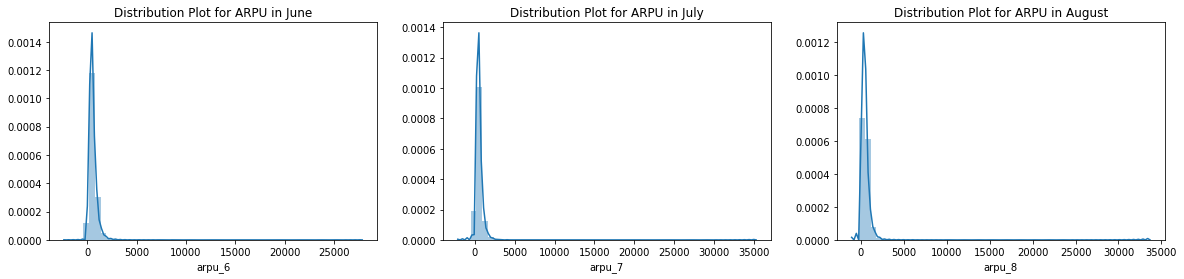

In [33]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in June")
sns.distplot(df_churn_hvc.arpu_6,ax=ax[0])
ax[1].set_title("Distribution Plot for ARPU in July")
sns.distplot(df_churn_hvc.arpu_7,ax=ax[1])
ax[2].set_title("Distribution Plot for ARPU in August")
sns.distplot(df_churn_hvc.arpu_8,ax=ax[2])
plt.show()

Text(0.5, 1.0, 'Distribution Plot for ARPU in June')

Text(0.5, 1.0, 'Distribution Plot for ARPU in July')

Text(0.5, 1.0, 'Distribution Plot for ARPU in August')

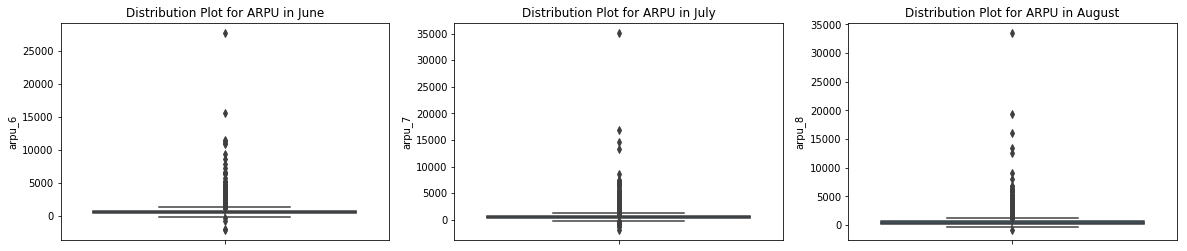

In [34]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in June")
sns.boxplot(df_churn_hvc.arpu_6,ax=ax[0], orient="v")
ax[1].set_title("Distribution Plot for ARPU in July")
sns.boxplot(df_churn_hvc.arpu_7,ax=ax[1], orient="v")
ax[2].set_title("Distribution Plot for ARPU in August")
sns.boxplot(df_churn_hvc.arpu_8,ax=ax[2], orient="v")
plt.show()

Text(0.5, 1.0, 'Distribution Plot for ARPU in June')

Text(0.5, 1.0, 'Distribution Plot for ARPU in July')

Text(0.5, 1.0, 'Distribution Plot for ARPU in August')

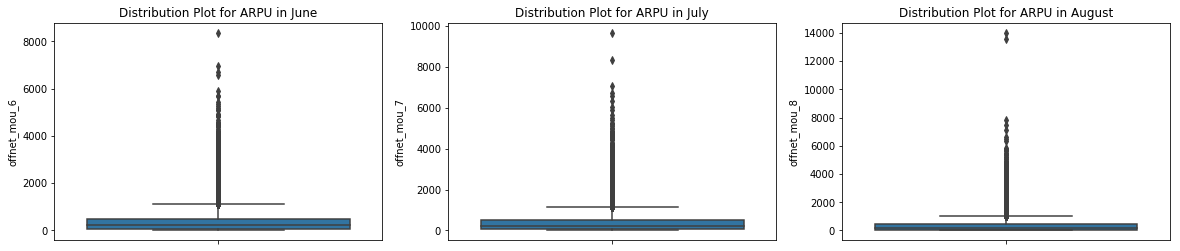

In [35]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in June")
sns.boxplot(df_churn_hvc.offnet_mou_6,ax=ax[0], orient="v")
ax[1].set_title("Distribution Plot for ARPU in July")
sns.boxplot(df_churn_hvc.offnet_mou_7,ax=ax[1], orient="v")
ax[2].set_title("Distribution Plot for ARPU in August")
sns.boxplot(df_churn_hvc.offnet_mou_8,ax=ax[2], orient="v")
plt.show()

Text(0.5, 1.0, 'Distribution Plot for ARPU in June')

Text(0.5, 1.0, 'Distribution Plot for ARPU in July')

Text(0.5, 1.0, 'Distribution Plot for ARPU in August')

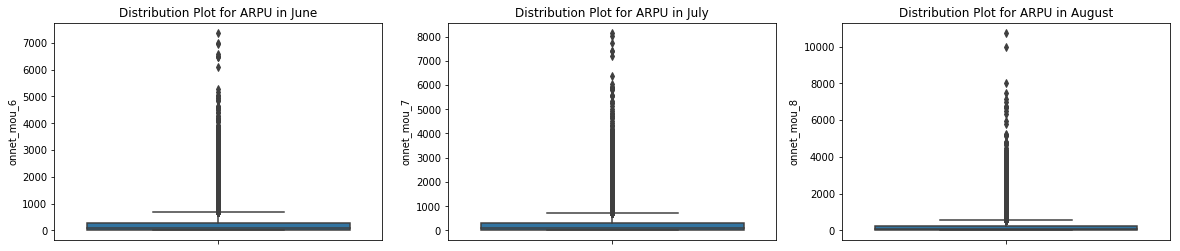

In [36]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in June")
sns.boxplot(df_churn_hvc.onnet_mou_6,ax=ax[0], orient="v")
ax[1].set_title("Distribution Plot for ARPU in July")
sns.boxplot(df_churn_hvc.onnet_mou_7,ax=ax[1], orient="v")
ax[2].set_title("Distribution Plot for ARPU in August")
sns.boxplot(df_churn_hvc.onnet_mou_8,ax=ax[2], orient="v")
plt.show()

Text(0.5, 1.0, 'Distribution Plot for ARPU in June')

Text(0.5, 1.0, 'Distribution Plot for ARPU in July')

Text(0.5, 1.0, 'Distribution Plot for ARPU in August')

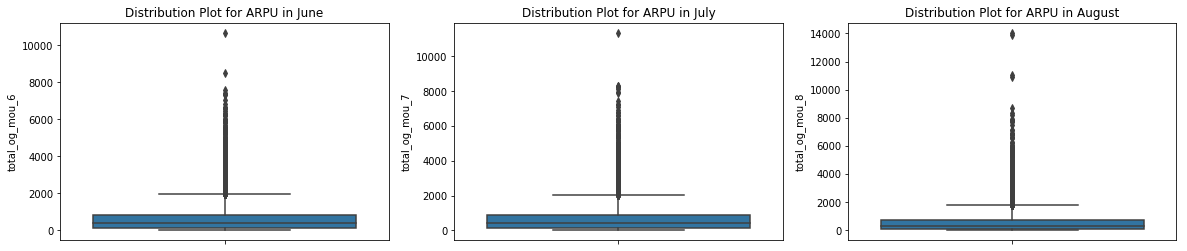

In [37]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in June")
sns.boxplot(df_churn_hvc.total_og_mou_6,ax=ax[0], orient="v")
ax[1].set_title("Distribution Plot for ARPU in July")
sns.boxplot(df_churn_hvc.total_og_mou_7,ax=ax[1], orient="v")
ax[2].set_title("Distribution Plot for ARPU in August")
sns.boxplot(df_churn_hvc.total_og_mou_8,ax=ax[2], orient="v")
plt.show()

Variables are very **skewed** towards the left.

## Bivariate EDA

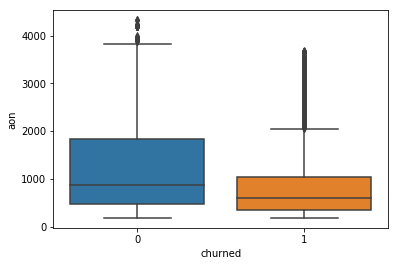

In [38]:
sns.boxplot(df_churn_hvc.churned, df_churn_hvc.aon)

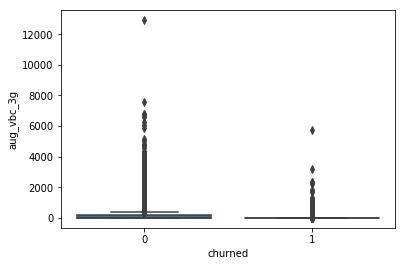

In [39]:
sns.boxplot(df_churn_hvc.churned, df_churn_hvc.aug_vbc_3g)

# Modelling

## 1 Making predictions

In [40]:
# import required libraries
from imblearn.metrics import sensitivity_specificity_support
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Data Preprocessing

In [41]:
# change churn to numeric
df_churn_hvc['churned'] = pd.to_numeric(df_churn_hvc['churned'])

In [42]:
# split data in training and test dataset
X = df_churn_hvc.drop("churned", axis = 1)
y = df_churn_hvc.churned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [43]:
# print size of rain and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 165)

(22500,)

(7501, 165)

(7501,)

## Aggregating the categorical columns

In [44]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('fb_user_6').churned.mean()
train.groupby('fb_user_7').churned.mean()
train.groupby('fb_user_8').churned.mean()
train.groupby('night_pck_user_6').churned.mean()
train.groupby('night_pck_user_7').churned.mean()
train.groupby('night_pck_user_8').churned.mean()

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churned, dtype: float64

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churned, dtype: float64

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churned, dtype: float64

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churned, dtype: float64

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churned, dtype: float64

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churned, dtype: float64

In [45]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [46]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cateogorical_columns if col not in ['churned']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
night_pck_user_6    22500 non-null float64
night_pck_user_7    22500 non-null float64
night_pck_user_8    22500 non-null float64
fb_user_6           22500 non-null float64
fb_user_7           22500 non-null float64
fb_user_8           22500 non-null float64
dtypes: float64(6)
memory usage: 1.2 MB


## PCA

In [47]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [48]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [49]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.97
1       17.81
2       23.37
3       28.00
4       31.91
5       35.54
6       38.49
7       41.05
8       43.50
9       45.73
10      47.82
11      49.86
12      51.79
13      53.56
14      55.30
15      57.03
16      58.67
17      60.16
18      61.62
19      62.94
20      64.20
21      65.41
22      66.61
23      67.79
24      68.94
25      70.04
26      71.11
27      72.14
28      73.14
29      74.14
        ...  
135    100.00
136    100.00
137    100.00
138    100.00
139    100.00
140    100.00
141    100.00
142    100.00
143    100.00
144    100.00
145    100.00
146    100.00
147    100.00
148    100.00
149    100.00
150    100.00
151    100.00
152    100.00
153    100.00
154    100.00
155    100.00
156    100.00
157    100.00
158    100.00
159    100.00
160    100.00
161    100.00
162    100.00
163    100.00
164    100.00
Length: 165, dtype: float64


~ 60 components explain 90% variance

~ 80 components explain 95% variance

<Figure size 630x360 with 0 Axes>

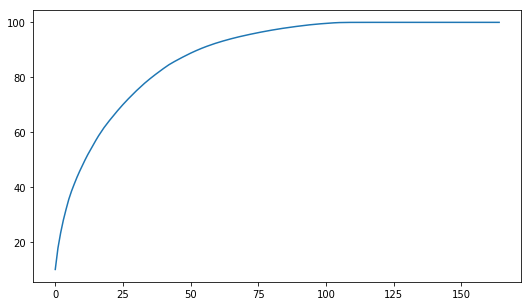

In [50]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [51]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [52]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

0.8148

### Evaluate on test data

In [53]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5563 1328]
 [  97  513]]
Sensitivity: 	0.84
Specificity: 	0.81
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [54]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churned, dtype: float64

In [55]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [56]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: ...enalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [57]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.721692,0.026234,0.042016,0.003172,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.886577,0.893347,...,0.884520,0.007763,27,0.889766,0.888528,0.893185,0.891318,0.889464,0.890452,0.001635
1,2.039410,0.031614,0.048701,0.007170,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.889929,0.895174,...,0.886931,0.007063,1,0.892890,0.890964,0.897307,0.894564,0.892859,0.893717,0.002126
2,2.213953,0.087154,0.045279,0.008500,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.888507,0.892088,...,0.884522,0.007401,26,0.892051,0.889955,0.894741,0.892386,0.890965,0.892019,0.001607
3,2.804557,0.181635,0.047302,0.004207,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.890772,0.894496,...,0.886417,0.006644,12,0.895585,0.893927,0.899274,0.896019,0.896206,0.896202,0.001734
4,1.787789,0.113457,0.044609,0.003523,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.887896,0.892210,...,0.884791,0.007262,17,0.892001,0.890380,0.895227,0.892769,0.891100,0.892295,0.001674
5,2.224303,0.036584,0.049981,0.019893,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.890754,0.894802,...,0.886913,0.006813,2,0.895695,0.893948,0.899523,0.896445,0.895500,0.896222,0.001839
6,2.427993,0.118753,0.044694,0.007228,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.888442,0.892689,...,0.884702,0.007706,21,0.892278,0.890452,0.894996,0.892553,0.891234,0.892303,0.001542
7,3.159799,0.208006,0.042159,0.003466,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.890256,0.894967,...,0.886335,0.006686,13,0.896237,0.894252,0.899625,0.896488,0.895560,0.896432,0.001775
8,1.846067,0.281103,0.051494,0.014093,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.887893,0.891903,...,0.884394,0.007591,32,0.892145,0.890240,0.894844,0.892782,0.891305,0.892263,0.001546
9,2.342002,0.088333,0.045376,0.014982,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.890584,0.894731,...,0.886843,0.006796,3,0.896054,0.894267,0.899701,0.896571,0.895169,0.896353,0.001849


In [58]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8869309547521473
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 80}


In [59]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5834 1057]
 [ 115  495]]
Sensitivity: 	0.81
Specificity: 	0.85
AUC:    	 0.9


### Random Forest

In [60]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [61]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [65]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8850141690828448
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [64]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6786  105]
 [ 323  287]]
Sensitivity: 	0.47
Specificity: 	0.98
AUC:    	 0.89


Poor sensitivity. The best model is PCA along with Logistic regression.

## ii) Choosing best features

In [62]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [63]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [66]:
# OOB score
rf_model.oob_score_

0.9440444444444445

In [67]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6789  102]
 [ 326  284]]
Sensitivity: 	0.47
Specificity: 	0.99


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [68]:
df_churn_hvc.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.000,127.095,0.0,212.0,89.5,1.0,89.5,92.0,-0.230,710.375


### Feature Importance

In [69]:
# predictors
#features = df_churn_hvc.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,83,6.399210
1,59,4.938687
2,56,3.622047
3,65,3.499570
4,142,3.100124
5,20,3.010960
6,53,2.888394
7,29,2.794647
8,98,2.785429
9,158,2.351345


### Extracting top 30 features

In [70]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [71]:
# Index of top 30 features
top_features

0      83
1      59
2      56
3      65
4     142
5      20
6      53
7      29
8      98
9     158
10      2
11     17
12     11
13     14
14    104
15    151
16    156
17    101
18    157
19      5
20    152
21     80
22    146
23     62
24      8
25    113
26    148
27    143
28    145
29    116
Name: variables, dtype: int64

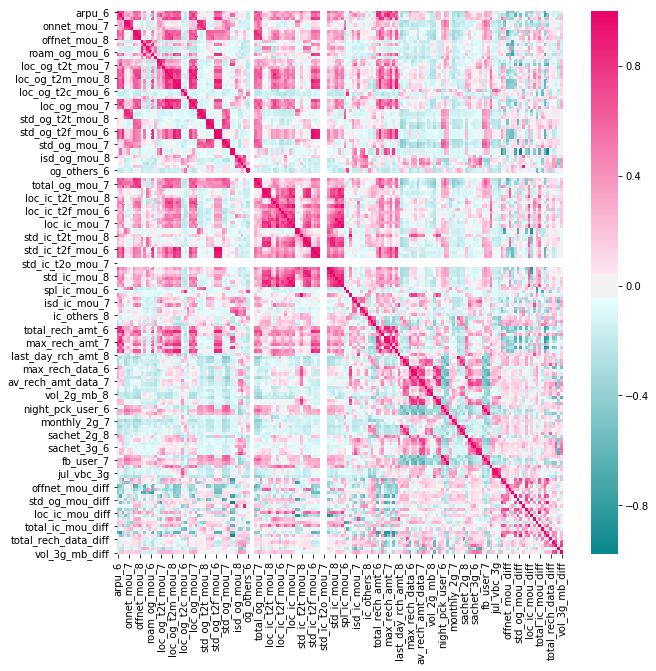

In [72]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train.iloc[top_features].corr(), center=0.0, cmap=mycmap)

In [73]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [74]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [75]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [76]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8741916236092184
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [77]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5722 1169]
 [ 122  488]]
Sensitivity: 	0.8
Specificity: 	0.83
ROC:    	 0.88


### Extract the intercept and the coefficients from the logistic model 

In [78]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [79]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [80]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [81]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.534054,-1.556931,-0.776262,-1.586756,0.247201,0.002567,0.189862,0.381219,-0.797625,1.039803


## Recommend strategies to manage customer churn


* Roaming rates are on the higher side, The telecom company need to come up with offers to make services affordable for customers
* Users with high usage of STD and ISD services have a higher probability to churn, The telecom company should offer special recharge packages to retain customers
* To effectively address these two areas, it is recommended to tailor Roaming charges and STD ISD services as per needs of customers
